# Train DeBCR tutorial

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import glob
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from util.utils import *
from configs.yaml_loader import *
import argparse

## Config

In [2]:
# define config (yaml) path

config_path = 'configs/LM_2D_denoising.yaml'

config = get_config(config_path)

In [3]:
# set GPU ID to use
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [5]:
!pwd

/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR/develop


## Data

In [6]:
# define the data path 
from natsort import natsorted

#DATA_PATH = "/full/path/to/data/2D_denoising/"  # use the absolute path!
DATA_PATH = "/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR/data/preproc_npz/"

# training
train_data_dir = DATA_PATH + 'train/'
train_data_list = natsorted(os.listdir(train_data_dir))

# validate
val_data_dir = DATA_PATH + 'val/'
val_data_list = natsorted(os.listdir(val_data_dir))  

In [7]:
# call for the data generator

# tranining
train_gen_class = DataGenerator(train_data_dir, train_data_list,config.data['train_batch'], config.data['noise'])
train_img_datagen = train_gen_class.imageLoader()

# validate
val_gen_class = DataGenerator(val_data_dir, val_data_list, config.data['val_batch'], config.data['noise'])
val_img_datagen = val_gen_class.imageLoader()

(32, 128, 128, 1)


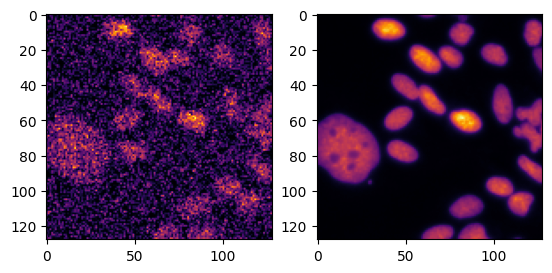

8


In [10]:
# sanity check

w_img_temp, o_temp = train_img_datagen.__next__()
print(w_img_temp.shape)

slice_num = random.randint(0, w_img_temp.shape[0]-1)
subShow(w_img_temp[slice_num].squeeze(), o_temp[slice_num].squeeze())
print(slice_num)

(16, 128, 128, 1)


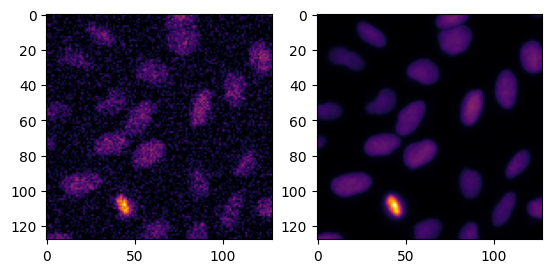

15


In [11]:
# sanity check

w_img_temp, o_temp = val_img_datagen.__next__()
print(w_img_temp.shape)

slice_num = random.randint(0, w_img_temp.shape[0]-1)
subShow(w_img_temp[slice_num].squeeze(), o_temp[slice_num].squeeze())
print(slice_num)

# Model

In [12]:
from models.DeBCR import *
from util.loss_func import *
from util.metrics import *

model = model_DeBCR()
model.compile(optimizer=config.training['opti'], loss=loss_function_mimo, metrics=[metrics_func_mimo])
print(model.input_shape, model.output_shape) # [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] 
print(model.summary())

[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x0_input (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 x2_input (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 x4_input (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                       

# Train

0 tf.Tensor(1.1104667, shape=(), dtype=float32) tf.Tensor(14.893388, shape=(), dtype=float32)
Validation best loss: 0 tf.Tensor(1.2117605, shape=(), dtype=float32) tf.Tensor(14.221756, shape=(), dtype=float32)
Objects: 22


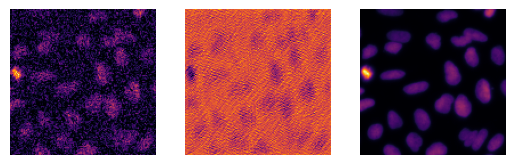

50 tf.Tensor(0.7545321, shape=(), dtype=float32) tf.Tensor(22.317783, shape=(), dtype=float32)
100 tf.Tensor(0.55837166, shape=(), dtype=float32) tf.Tensor(24.728313, shape=(), dtype=float32)
Validation best loss: 100 tf.Tensor(0.51741105, shape=(), dtype=float32) tf.Tensor(25.665094, shape=(), dtype=float32)
Objects: 22


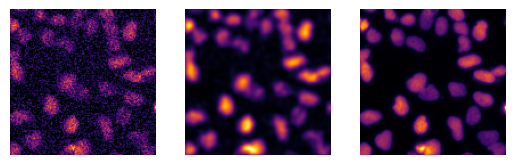

150 tf.Tensor(0.50942695, shape=(), dtype=float32) tf.Tensor(24.96696, shape=(), dtype=float32)
200 tf.Tensor(0.45653462, shape=(), dtype=float32) tf.Tensor(25.346626, shape=(), dtype=float32)
Validation best loss: 200 tf.Tensor(0.4722706, shape=(), dtype=float32) tf.Tensor(24.806114, shape=(), dtype=float32)
Objects: 9


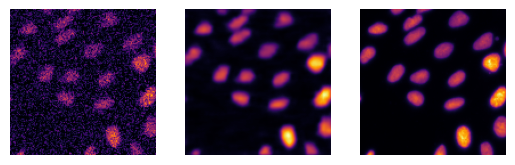

250 tf.Tensor(0.43381694, shape=(), dtype=float32) tf.Tensor(27.710945, shape=(), dtype=float32)
300 tf.Tensor(0.43144798, shape=(), dtype=float32) tf.Tensor(26.853065, shape=(), dtype=float32)
Validation best loss: 300 tf.Tensor(0.35582522, shape=(), dtype=float32) tf.Tensor(29.249987, shape=(), dtype=float32)
Objects: 27


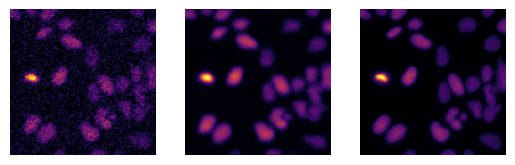

350 tf.Tensor(0.43813384, shape=(), dtype=float32) tf.Tensor(27.281563, shape=(), dtype=float32)
400 tf.Tensor(0.38980472, shape=(), dtype=float32) tf.Tensor(27.189802, shape=(), dtype=float32)
Objects: 18


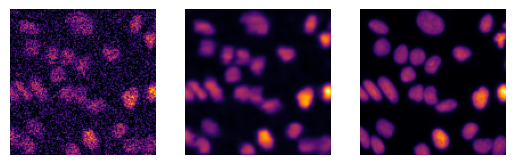

450 tf.Tensor(0.43362135, shape=(), dtype=float32) tf.Tensor(26.74847, shape=(), dtype=float32)
500 tf.Tensor(0.42922494, shape=(), dtype=float32) tf.Tensor(27.515875, shape=(), dtype=float32)
Objects: 26


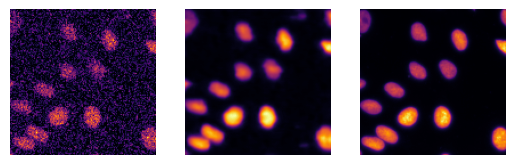

550 tf.Tensor(0.41083008, shape=(), dtype=float32) tf.Tensor(26.6044, shape=(), dtype=float32)
600 tf.Tensor(0.4367287, shape=(), dtype=float32) tf.Tensor(24.955555, shape=(), dtype=float32)
Objects: 28


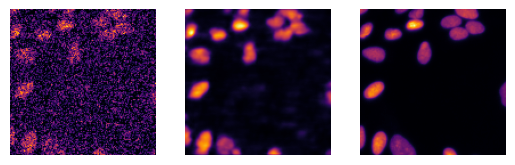

650 tf.Tensor(0.40564644, shape=(), dtype=float32) tf.Tensor(28.341667, shape=(), dtype=float32)
700 tf.Tensor(0.38283196, shape=(), dtype=float32) tf.Tensor(28.380816, shape=(), dtype=float32)
Objects: 8


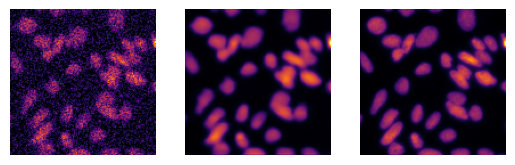

750 tf.Tensor(0.38805673, shape=(), dtype=float32) tf.Tensor(28.373062, shape=(), dtype=float32)
800 tf.Tensor(0.45801723, shape=(), dtype=float32) tf.Tensor(26.484684, shape=(), dtype=float32)
Objects: 9


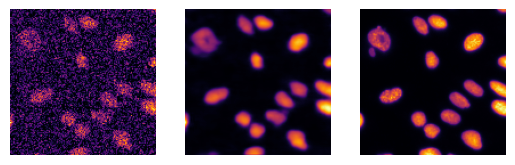

850 tf.Tensor(0.40156162, shape=(), dtype=float32) tf.Tensor(28.032818, shape=(), dtype=float32)
900 tf.Tensor(0.4266085, shape=(), dtype=float32) tf.Tensor(25.163284, shape=(), dtype=float32)
Objects: 25


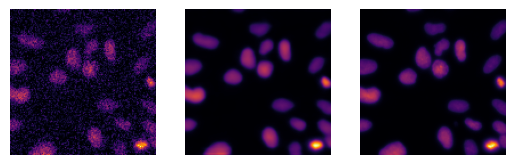

950 tf.Tensor(0.37159726, shape=(), dtype=float32) tf.Tensor(29.4049, shape=(), dtype=float32)
1000 tf.Tensor(0.47338212, shape=(), dtype=float32) tf.Tensor(24.33162, shape=(), dtype=float32)
Objects: 3


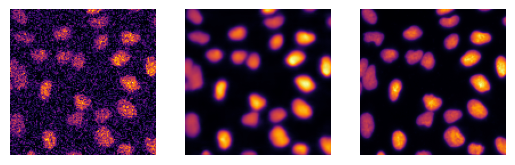

1050 tf.Tensor(0.43629283, shape=(), dtype=float32) tf.Tensor(26.983599, shape=(), dtype=float32)
1100 tf.Tensor(0.35437208, shape=(), dtype=float32) tf.Tensor(28.868237, shape=(), dtype=float32)
Objects: 27


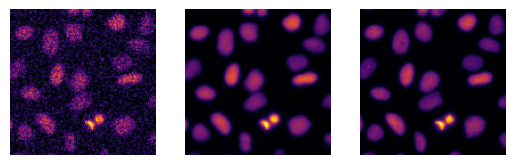

1150 tf.Tensor(0.3580429, shape=(), dtype=float32) tf.Tensor(29.732147, shape=(), dtype=float32)
1200 tf.Tensor(0.3652373, shape=(), dtype=float32) tf.Tensor(29.164555, shape=(), dtype=float32)
Objects: 5


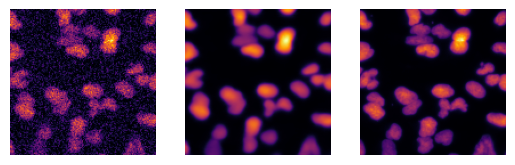

1250 tf.Tensor(0.408154, shape=(), dtype=float32) tf.Tensor(24.996134, shape=(), dtype=float32)
1300 tf.Tensor(0.41056287, shape=(), dtype=float32) tf.Tensor(26.809456, shape=(), dtype=float32)
Objects: 7


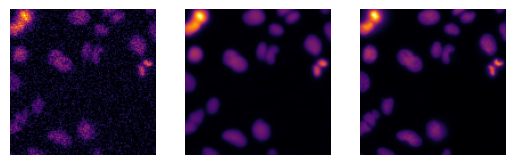

Early stopping due to no improvement in validation loss. 1300
Elapsed time: 999.6164035797119


In [13]:
# training
from trainer_DeBCR import train_model as trainer
model_trained = trainer(config, model, multi_input, loss_function_mimo, metrics_func_mimo, train_img_datagen, val_img_datagen, config.training['visual'])

# Visualization

In [14]:
# visualize part prediction results

w_img_val_temp, o_val_temp = val_img_datagen.__next__()
w_val_temp_list, o_val_temp_list = multi_input(w_img_val_temp, o_val_temp)

pred_val_list = model_trained.predict(w_val_temp_list) 

1/1 [==============================] - 2s 2s/step


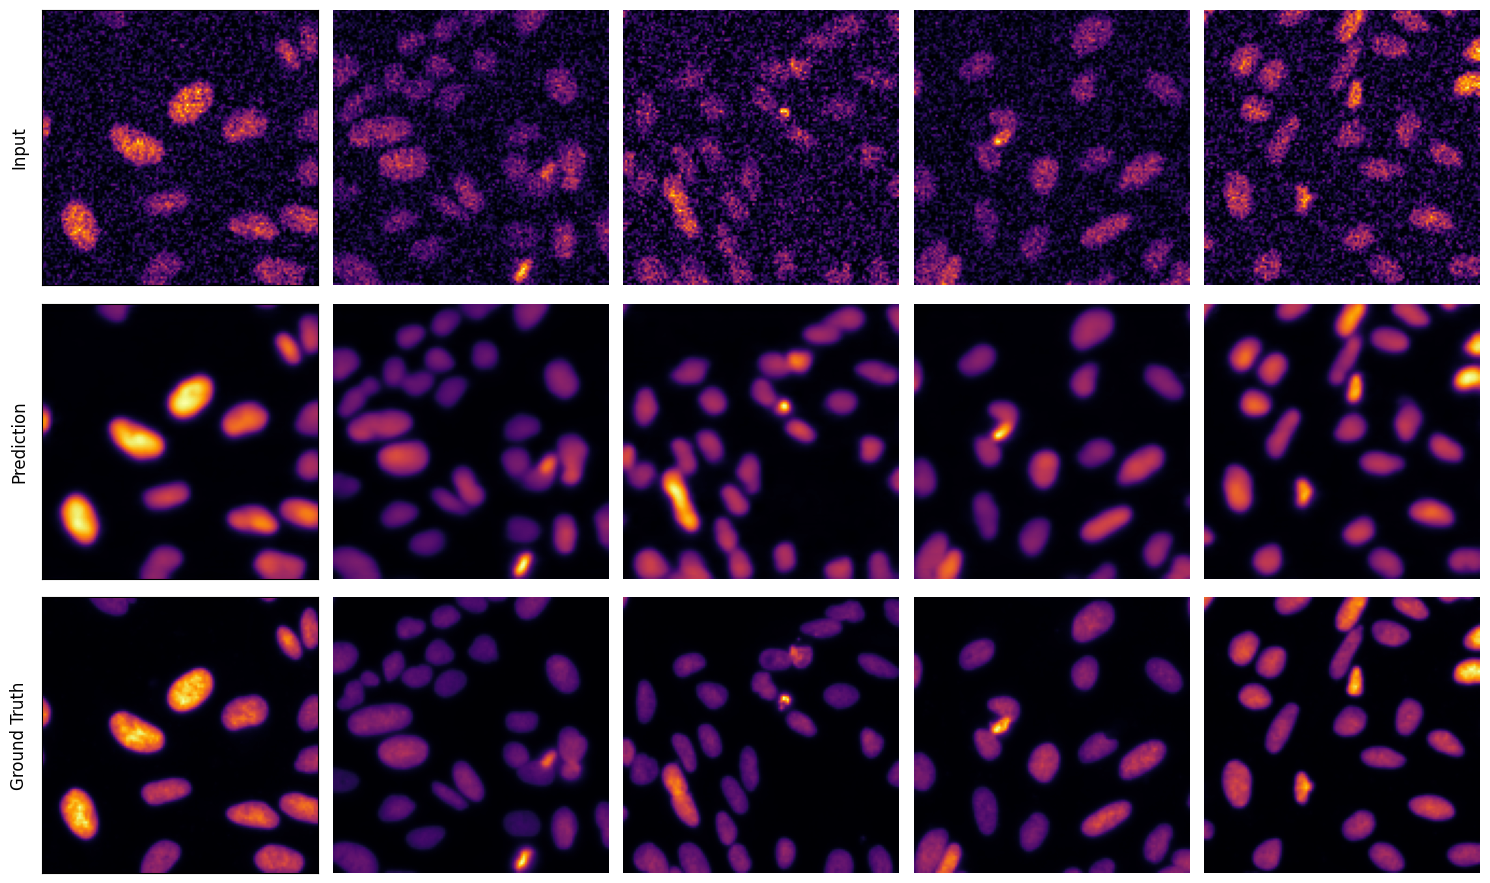

In [15]:
# choose the visualizer
show_grid(pred_val_list[0], w_val_temp_list[0], o_val_temp_list[0])